In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import numpy as np
import tensorboard as tb

In [47]:
log_dir = Path("../oracle/experiments/cc_out/entmax_alphas/20221210/oracle/1.01")

# read_csv(..., skiprows=1000000, nrows=999999)
# runs = [pd.read_csv(p, sep="\t", names=["datetime", "state", "action", "reward", "next_state", "done", "loss"]) for p in logfiles]
pre_runs = [pd.read_csv(p, nrows=14, names=["epoch", "g_loss", "nll_oracle", "nll_gen"]) for p in log_dir.rglob("*.csv")]
adv_runs = [pd.read_csv(p, skiprows=15, names=["adv_step", "nll_oracle", "nll_gen", "support_mean"]) for p in log_dir.rglob("*.csv")]

In [50]:

# Get best NLLs

best_nlls = []
for run in adv_runs:
    run_nll_oracles = run["nll_oracle"].str.replace('nll_oracle: ', '')
    # print(run_nll_oracles)
    best_nlls.append(run_nll_oracles.min())

support_means = np.array([run["support_mean"].str.replace('support_mean: ', '').values.astype(float) for run in adv_runs])
support_means = support_means.mean()
print("support: ", support_means)
print("sparsity: ", 100*(1.0-support_means/5000))
    

best_nlls = np.array(best_nlls, dtype=np.float32)
mean = np.mean(best_nlls)
std = np.std(best_nlls)
print()
print(best_nlls)
print("mean: ", mean)
print("std: ", std)

support:  3973.7955208
sparsity:  20.524089584000006

[6.7688 6.5415 6.6596]
mean:  6.6566334
std:  0.09281842


In [152]:
# "log_dirs = {\n",
#     "    \"1.00001\": Path(\"../oracle/experiments/cc_out/entmax_alphas/20221210/oracle/alpha1.00001\"),\n",
#     "    \"1.1\": Path(\"../oracle/experiments/cc_out/entmax_alphas/20221210/oracle/alpha1.1\"),\n",
#     "    \"1.3\": Path(\"../oracle/experiments/cc_out/entmax_alphas/20221210/oracle/alpha1.3\"),\n",
#     "    \"1.5\": Path(\"../oracle/experiments/cc_out/entmax_alphas/20221210/oracle/alpha1.5\"),\n",
#     "    \"1.7\": Path(\"../oracle/experiments/cc_out/entmax_alphas/20221210/oracle/alpha1.7\"),\n",
#     "    \"2.0\": Path(\"../oracle/experiments/cc_out/entmax_alphas/20221210/oracle/alpha2.0\"),\n",
#     "}"

log_dirs = {
    "1.00001": Path("../oracle/experiments/cc_out/entmax_alphas/20221210/oracle/alpha1.00001"),
}

# log_dirs = {
#     "Gumbel-softmax": Path("../oracle/experiments/cc_out/gs/20221209/oracle"),
#     "Sparsemax": Path("../oracle/experiments/cc_out/sparsemax"),
# }

245
245
245
245
245
245


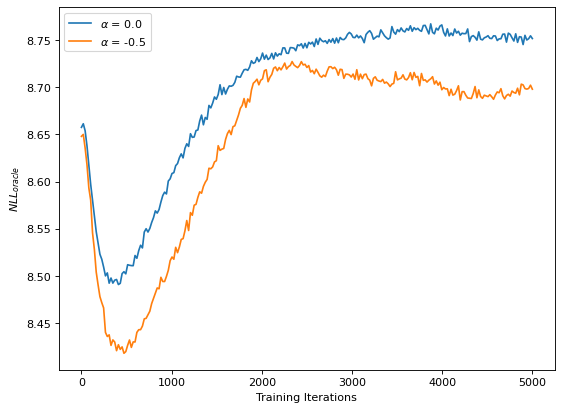

In [162]:
# NLL plots - averaged across runs

f = plt.figure(figsize=(8,6), dpi=80)
steps = np.linspace(0, 5000, 245)

avg_nlls = {}
for alpha, ld in log_dirs.items():
    adv_runs = [pd.read_csv(p, skiprows=15, nrows=245, names=["adv_step", "nll_oracle", "nll_gen", "support_mean"]) for p in ld.rglob("*.csv")]
    nlls = np.array([run["nll_oracle"].str.replace('nll_oracle: ', '').values.astype(float) for run in adv_runs])
    avg_nlls = nlls.mean(axis=0)
    plt.plot(steps, avg_nlls, label=r"$\alpha$ = " + alpha)
    
plt.legend(prop={'size': 10})
plt.xlabel("Training Iterations")
plt.ylabel(r"$NLL_{oracle}$")
# plt.show()
plt.savefig("relgan_base_nll.png")

# single_nll = adv_runs[3]["nll_oracle"].str.replace('nll_oracle: ', '').values.astype(float)

# for avg_nlls 
# print(avg_nlls.shape)
# plt.plot(avg_nlls)
# plt.plot(single_nll)
# plt.plot(nlls)
# for run in adv_runs:
#     # concat_runs = pd.concat((df1, df2))

# print df_concat.mean()